In [45]:
import pandas as pd
import numpy as np
import plotly.express as px
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.nonparametric.smoothers_lowess import lowess
from sklearn.linear_model import LogisticRegression
import seaborn as sns

# Rule Level Data

In [2]:
rules = pd.read_csv("../output_data/seth/rule_level_data.csv")
rules.sort_values(by=["communityID", "ruleID"], inplace=True)

In [3]:
rules.head(5)

,name_change_type,description_change_type,violation_change_type,date_observed,timestamp_rule,communityID,ref,ruleID,rule_age_in_days
354500,unchanged,unchanged,never_present,2021-04-23 00:00:00,2020-01-01,007_link,https://www.reddit.com/r/007_link/,007_link_0,478
234325,unchanged,never_present,never_present,2021-04-23 00:00:00,2021-01-01,007nightfire,https://www.reddit.com/r/007nightfire/,007nightfire_0,112
234326,unchanged,never_present,never_present,2021-04-23 00:00:00,2021-01-01,007nightfire,https://www.reddit.com/r/007nightfire/,007nightfire_1,112
234327,unchanged,never_present,never_present,2021-04-23 00:00:00,2021-01-01,007nightfire,https://www.reddit.com/r/007nightfire/,007nightfire_2,112
234328,unchanged,never_present,never_present,2021-04-23 00:00:00,2021-01-01,007nightfire,https://www.reddit.com/r/007nightfire/,007nightfire_3,112


# Hypothesis Testing

## H: the older the rule, the more likely it is to be deleted

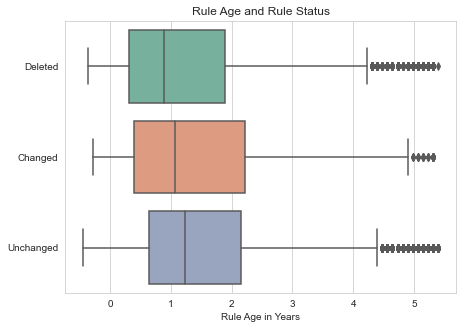

In [74]:
# Creating dataset
deleted = np.array(rules[rules.name_change_type == 'deleted'].rule_age_in_days)
unchanged = np.array(rules[rules.name_change_type == 'unchanged'].rule_age_in_days)
changed = np.array(rules[rules.name_change_type == 'changed'].rule_age_in_days)

data = np.array([deleted, changed, unchanged], dtype=object)/365
  
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(7, 5))
sns.boxplot(data=data.T, ax=ax, palette="Set2", saturation = 0.6, orient="h")
ax.set_xlabel("Rule Age in Years")
ax.set_title("Rule Age and Rule Status")
ax.set_yticklabels(['Deleted', 'Changed', 'Unchanged'])
plt.savefig('../result_figures/rule_age_and_status_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

# Sub Level Data

In [5]:
sub_metadata = pd.read_csv("../output_data/seth/sub_level_data.csv")
sub_metadata

,communityID,added,changed,deleted,unchanged,subscribers_1,subscribers_2,rules_1,rules_2,timestamp_1,timestamp_2,founding_date,age_in_months
0,007_link,0.0,0.0,0.0,1.0,7,7,1,1,1.627687e+09,1.644941e+09,1.579930e+09,14.908671
1,007nightfire,0.0,0.0,0.0,5.0,68,91,5,5,1.625925e+09,1.643361e+09,1.609863e+09,3.526107
2,00games,0.0,0.0,0.0,4.0,2,3,4,4,1.630524e+09,1.646246e+09,1.580752e+09,14.596170
3,00saesthetics,0.0,0.0,0.0,6.0,2836,2995,6,6,1.624697e+09,1.642362e+09,1.562924e+09,21.375357
4,00sbabies,0.0,0.0,0.0,6.0,300,298,6,6,1.625180e+09,1.642880e+09,1.595696e+09,8.913409
...,...,...,...,...,...,...,...,...,...,...,...,...,...
130846,zyramains,0.0,0.0,0.0,9.0,10085,11382,9,9,1.624172e+09,1.642224e+09,1.419736e+09,75.824785
130847,zyxcomments,0.0,0.0,0.0,1.0,8,8,1,1,1.627579e+09,1.644794e+09,1.562897e+09,21.385681
130848,zyzz,1.0,0.0,1.0,1.0,7245,11991,2,2,1.624310e+09,1.642229e+09,1.311994e+09,116.795459
130849,zztails,0.0,0.0,0.0,2.0,137,142,2,2,1.625469e+09,1.643165e+09,1.546838e+09,27.492575


# Hypothesis Testing-- Sub Size

## Punctuated Eq Scatterplot

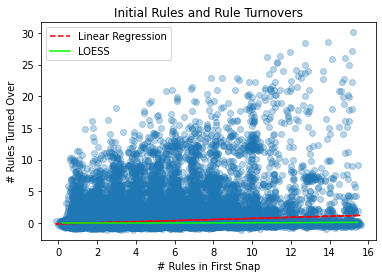

In [6]:
std = 0.25
y = np.array((sub_metadata.added + sub_metadata.deleted + sub_metadata.changed)) + np.random.normal(0, std,len(sub_metadata))
x = np.array(sub_metadata.rules_1) + np.random.normal(0,std,len(sub_metadata))


# Plot the scatter plot with the calculated area
plt.scatter(x, y, alpha=0.3)


# linear regression
reg = LinearRegression().fit(x.reshape(-1, 1), y)
y_line = reg.predict(x.reshape(-1,1))
plt.plot(x, y_line, color='r', linestyle='--', label = 'Linear Regression')


# LOESS smoother
sample_size = 10000
sample_indices = np.random.choice(len(x), sample_size, replace=False)
x_sample = x[sample_indices]
y_sample = y[sample_indices]
smoothed = lowess(y_sample, x_sample, frac=0.3)
plt.plot(smoothed[:,0], smoothed[:,1], label='LOESS', color='lime')

plt.ylabel("# Rules Turned Over")
plt.xlabel("# Rules in First Snap")
plt.title("Initial Rules and Rule Turnovers")
plt.legend()

plt.show()

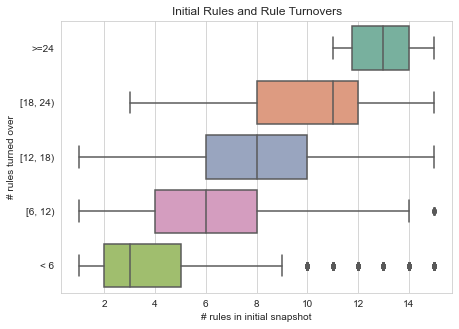

In [73]:
# Creating dataset
sub_metadata['turned_over'] = sub_metadata.added + sub_metadata.deleted + sub_metadata.changed
first_bin = np.array(sub_metadata[sub_metadata.turned_over < 6].rules_1)
second_bin = np.array(sub_metadata[(sub_metadata.turned_over >= 6) & (sub_metadata.turned_over < 12)].rules_1)
third_bin = np.array(sub_metadata[(sub_metadata.turned_over >= 12) & (sub_metadata.turned_over < 18)].rules_1)
fourth_bin = np.array(sub_metadata[(sub_metadata.turned_over >= 18) & (sub_metadata.turned_over < 24)].rules_1)
fifth_bin = np.array(sub_metadata[(sub_metadata.turned_over >= 24)].rules_1)
data = np.array([fifth_bin, fourth_bin, third_bin, second_bin, first_bin], dtype=object)
 
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(7, 5))
sns.boxplot(data=data.T, ax=ax, palette="Set2", saturation = 0.6, orient="h")
ax.set_xlabel("# rules in initial snapshot")
ax.set_ylabel("# rules turned over")
ax.set_title("Initial Rules and Rule Turnovers")
ax.set_yticklabels(['>=24', '[18, 24)', '[12, 18)', '[6, 12)', '< 6'])
plt.savefig('../result_figures/initial_rules_and_turnover_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

## H: The bigger the sub, the more likely that they will add >=1 rule

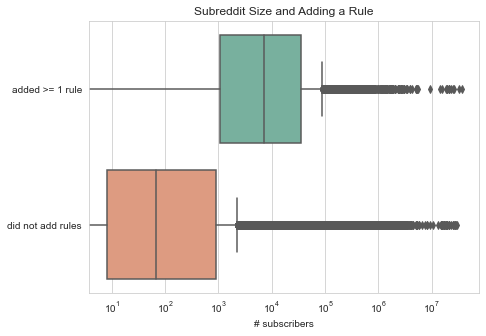

In [72]:
# Creating dataset
added = np.array(sub_metadata[sub_metadata.added > 0].subscribers_1)
not_added = np.array(sub_metadata[sub_metadata.added == 0].subscribers_1)
data = np.array([added, not_added], dtype=object)

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(7, 5))
sns.boxplot(data=data.T, ax=ax, palette="Set2", saturation = 0.6, orient="h")
ax.set_xlabel("# subscribers")
ax.set_xscale("log")
ax.set_title("Subreddit Size and Adding a Rule")
ax.set_yticklabels(['added >= 1 rule', 'did not add rules'])
plt.savefig('../result_figures/subscribers_and_single_addition_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

## H: the bigger the sub, the more rules they add

C:\Users\nammy\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


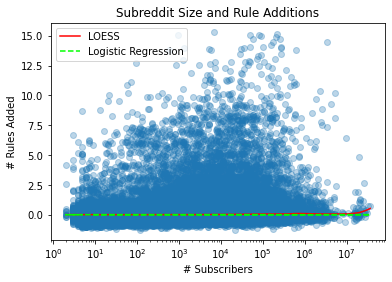

In [9]:
x = np.array(sub_metadata.subscribers_1 + 2)
y = np.array(sub_metadata.added) + np.random.normal(0,0.3,len(sub_metadata))

# Plot the scatter plot with the calculated area
plt.scatter(x, y, alpha=0.3)
plt.xscale("log")

# LOESS smoother
sample_size = 10000 # made this bigger
sample_indices = np.random.choice(len(x), sample_size, replace=False)
x_sample = x[sample_indices]
y_sample = y[sample_indices]
smoothed = lowess(y_sample, x_sample, frac=0.3)
plt.plot(smoothed[:,0], smoothed[:,1], label='LOESS', color='red')

y_add_1 = np.where(sub_metadata.added > 0, 1, 0)
# logistic regression
reg = LogisticRegression().fit(x.reshape(-1, 1), y_add_1)
y_line = reg.predict(x.reshape(-1,1))
plt.plot(x, y_line, color='lime', linestyle='--', label = 'Logistic Regression')

plt.legend()
plt.xlabel("# Subscribers")
plt.ylabel("# Rules Added")
plt.title("Subreddit Size and Rule Additions")
plt.show()

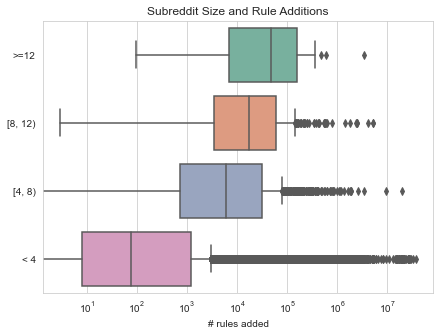

In [71]:
# Creating dataset
first_bin = np.array(sub_metadata[sub_metadata.added < 4].subscribers_1)
second_bin = np.array(sub_metadata[(sub_metadata.added >= 4) & (sub_metadata.added < 8)].subscribers_1)
third_bin = np.array(sub_metadata[(sub_metadata.added >= 8) & (sub_metadata.added < 12)].subscribers_1)
fourth_bin = np.array(sub_metadata[(sub_metadata.added >= 12)].subscribers_1)
data = np.array([fourth_bin, third_bin, second_bin, first_bin], dtype=object)

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(7, 5))
sns.boxplot(data=data.T, ax=ax, palette="Set2", saturation = 0.6, orient="h")
ax.set_xlabel("# subscribers")
ax.set_xlabel("# rules added")
ax.set_xscale("log")
ax.set_title("Subreddit Size and Rule Additions")
ax.set_yticklabels(['>=12', '[8, 12)', '[4, 8)', '< 4'])
plt.savefig('../result_figures/subscribers_and_additions_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

## H: the bigger the sub, the more rules they delete

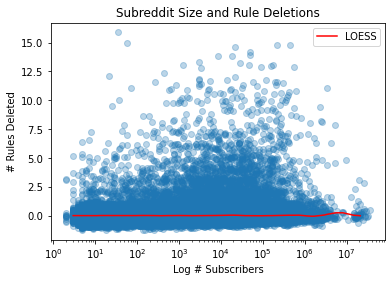

In [11]:
x = np.array(sub_metadata.subscribers_1 + 2)
y = np.array(sub_metadata.deleted) + np.random.normal(0,0.3,len(sub_metadata))

# Plot the scatter plot with the calculated area
plt.scatter(x, y, alpha=0.3)
plt.xscale("log")

# LOESS smoother
sample_size = 10000
sample_indices = np.random.choice(len(x), sample_size, replace=False)
x_sample = x[sample_indices]
y_sample = y[sample_indices]
smoothed = lowess(y_sample, x_sample, frac=0.3)
plt.plot(smoothed[:,0], smoothed[:,1], label='LOESS', color='red')
plt.legend()


plt.xlabel("Log # Subscribers")
plt.ylabel("# Rules Deleted")
plt.title("Subreddit Size and Rule Deletions")

plt.show()

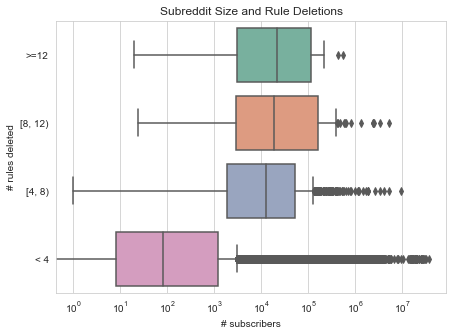

In [70]:
# Creating dataset
first_bin = np.array(sub_metadata[sub_metadata.deleted < 4].subscribers_1)
second_bin = np.array(sub_metadata[(sub_metadata.deleted >= 4) & (sub_metadata.deleted < 8)].subscribers_1)
third_bin = np.array(sub_metadata[(sub_metadata.deleted >= 8) & (sub_metadata.deleted < 12)].subscribers_1)
fourth_bin = np.array(sub_metadata[(sub_metadata.deleted >= 12)].subscribers_1)
data = np.array([fourth_bin, third_bin, second_bin, first_bin], dtype=object)

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(7, 5))
sns.boxplot(data=data.T, ax=ax, palette="Set2", saturation = 0.6, orient="h")
ax.set_xlabel("# subscribers")
ax.set_ylabel("# rules deleted")
ax.set_xscale("log")
ax.set_title("Subreddit Size and Rule Deletions")
ax.set_yticklabels(['>=12', '[8, 12)', '[4, 8)', '< 4'])
plt.savefig('../result_figures/subscribers_and_deletions_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

## H: The bigger the sub, the more likely they will delete >=1 rule

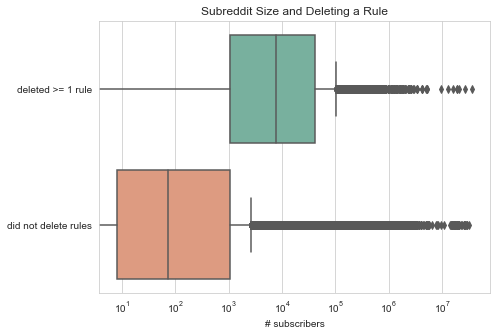

In [69]:
# Creating dataset
deleted = np.array(sub_metadata[sub_metadata.deleted > 0].subscribers_1)
not_deleted = np.array(sub_metadata[sub_metadata.deleted == 0].subscribers_1)
data = np.array([deleted, not_deleted], dtype=object)

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(7, 5))
sns.boxplot(data=data.T, ax=ax, palette="Set2", saturation = 0.6, orient="h")
ax.set_xlabel("# subscribers")
ax.set_xscale("log")
ax.set_title("Subreddit Size and Deleting a Rule")
ax.set_yticklabels(['deleted >= 1 rule', 'did not delete rules'])
plt.savefig('../result_figures/subscribers_and_single_deletion_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

## H: the bigger the sub, the more total changes they will make

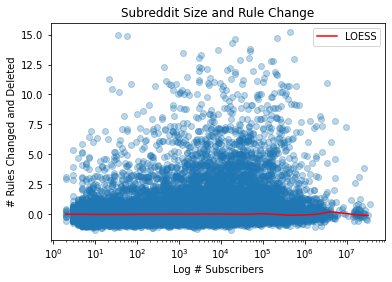

In [14]:
#     1 scatterplot x = #subscribers, y = sum(rules changed  + rules deleted)
x = np.array(sub_metadata.subscribers_1 + 2)
y = np.array(sub_metadata.deleted + sub_metadata.changed) + np.random.normal(0,0.3,len(sub_metadata))
# Plot the scatter plot with the calculated area
plt.scatter(x, y, alpha=0.3)
plt.xscale("log")

# LOESS smoother
sample_size = 10000
sample_indices = np.random.choice(len(x), sample_size, replace=False)
x_sample = x[sample_indices]
y_sample = y[sample_indices]
smoothed = lowess(y_sample, x_sample, frac=0.3)
plt.plot(smoothed[:,0], smoothed[:,1], label='LOESS', color='red')
plt.legend()


plt.xlabel("Log # Subscribers")
plt.ylabel("# Rules Changed and Deleted")
plt.title("Subreddit Size and Rule Change")

plt.show()

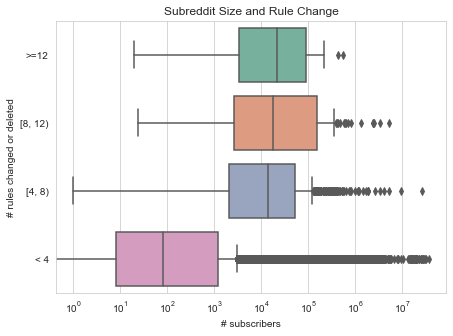

In [68]:
# Creating dataset
sub_metadata['total_changes'] = sub_metadata.deleted + sub_metadata.changed
first_bin = np.array(sub_metadata[sub_metadata.total_changes < 4].subscribers_1)
second_bin = np.array(sub_metadata[(sub_metadata.total_changes >= 4) & (sub_metadata.total_changes < 8)].subscribers_1)
third_bin = np.array(sub_metadata[(sub_metadata.total_changes >= 8) & (sub_metadata.total_changes < 12)].subscribers_1)
fourth_bin = np.array(sub_metadata[(sub_metadata.total_changes >= 12)].subscribers_1)
data = np.array([fourth_bin, third_bin, second_bin, first_bin], dtype=object)

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(7, 5))
sns.boxplot(data=data.T, ax=ax, palette="Set2", saturation = 0.6, orient="h")
ax.set_xlabel("# subscribers")
ax.set_ylabel("# rules changed or deleted")
ax.set_xscale("log")
ax.set_title("Subreddit Size and Rule Change")
ax.set_yticklabels(['>=12', '[8, 12)', '[4, 8)', '< 4'])
plt.savefig('../result_figures/subscribers_and_changes_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

# Hypothesis testing-- Sub Age

## H: the older the sub, the less likely that they will add a rule

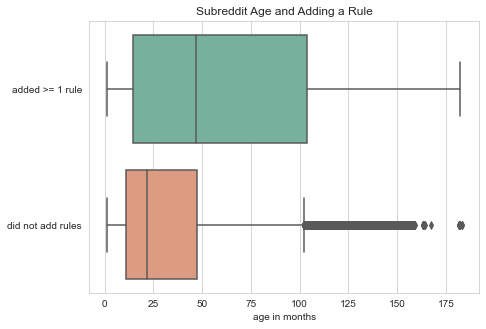

In [67]:
# Creating dataset
added = np.array(sub_metadata[sub_metadata.added > 0].age_in_months)
not_added = np.array(sub_metadata[sub_metadata.added == 0].age_in_months)
data = np.array([added, not_added], dtype=object)

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(7, 5))
sns.boxplot(data=data.T, ax=ax, palette="Set2", saturation = 0.6, orient="h")
ax.set_xlabel("age in months")
# ax.set_ylabel("# rules changed or deleted")
# ax.set_xscale("log")
ax.set_title("Subreddit Age and Adding a Rule")
ax.set_yticklabels(['added >= 1 rule', 'did not add rules'])
plt.savefig('../result_figures/age_and_single_addition_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

## H: the older the sub, the fewer rules they add

C:\Users\nammy\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


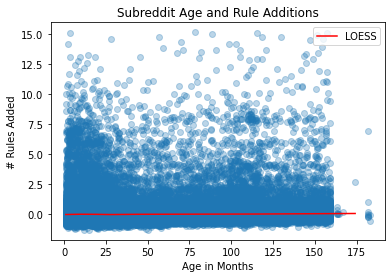

In [17]:
x = np.array(sub_metadata.age_in_months) 
y = np.array(sub_metadata.added) + np.random.normal(0,0.3,len(sub_metadata))

# Plot the scatter plot with the calculated area
plt.scatter(x, y, alpha=0.3)

# LOESS smoother
sample_size = 10000
sample_indices = np.random.choice(len(x), sample_size, replace=False)
x_sample = x[sample_indices]
y_sample = y[sample_indices]
smoothed = lowess(y_sample, x_sample, frac=0.3)
plt.plot(smoothed[:,0], smoothed[:,1], label='LOESS', color='red')
plt.legend()

plt.xlabel("Age in Months")
plt.ylabel("# Rules Added")
plt.title("Subreddit Age and Rule Additions")

plt.show()

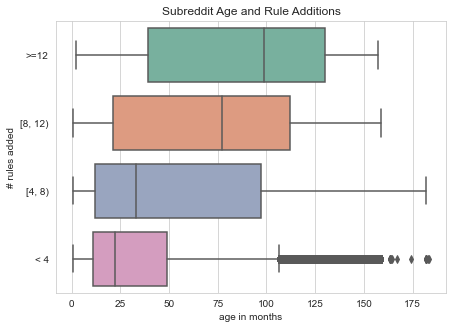

In [66]:
# Creating dataset
first_bin = np.array(sub_metadata[sub_metadata.added < 4].age_in_months)
second_bin = np.array(sub_metadata[(sub_metadata.added >= 4) & (sub_metadata.added < 8)].age_in_months)
third_bin = np.array(sub_metadata[(sub_metadata.added >= 8) & (sub_metadata.added < 12)].age_in_months)
fourth_bin = np.array(sub_metadata[(sub_metadata.added >= 12)].age_in_months)
data = np.array([fourth_bin, third_bin, second_bin, first_bin], dtype=object)

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(7, 5))
sns.boxplot(data=data.T, ax=ax, palette="Set2", saturation = 0.6, orient="h")
ax.set_xlabel("age in months")
ax.set_ylabel("# rules added")
ax.set_title("Subreddit Age and Rule Additions")
ax.set_yticklabels(['>=12', '[8, 12)', '[4, 8)', '< 4'])
plt.savefig('../result_figures/age_and_additions_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

## H: the older the sub, the less likely that they will delete a rule

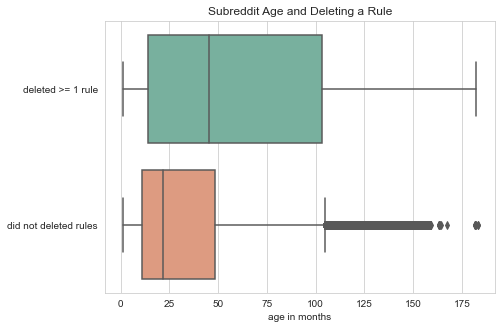

In [65]:
# Creating dataset
deleted = np.array(sub_metadata[sub_metadata.deleted > 0].age_in_months)
not_deleted = np.array(sub_metadata[sub_metadata.deleted == 0].age_in_months)
data = np.array([deleted, not_deleted], dtype=object)

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(7, 5))
sns.boxplot(data=data.T, ax=ax, palette="Set2", saturation = 0.6, orient="h")
ax.set_xlabel("age in months")
# ax.set_ylabel("# rules added")
ax.set_title("Subreddit Age and Deleting a Rule")
ax.set_yticklabels(['deleted >= 1 rule', 'did not deleted rules'])
plt.savefig('../result_figures/age_and_single_deletion_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

## H: the older the sub, the fewer rules they delete

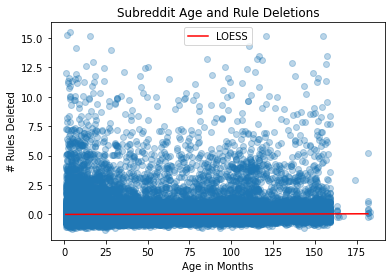

In [20]:
x = np.array(sub_metadata.age_in_months) 
y = np.array(sub_metadata.deleted) + np.random.normal(0,0.3,len(sub_metadata))

# Plot the scatter plot with the calculated area
plt.scatter(x, y, alpha=0.3)

# LOESS smoother
sample_size = 10000
sample_indices = np.random.choice(len(x), sample_size, replace=False)
x_sample = x[sample_indices]
y_sample = y[sample_indices]
smoothed = lowess(y_sample, x_sample, frac=0.3)
plt.plot(smoothed[:,0], smoothed[:,1], label='LOESS', color='red')
plt.legend()

plt.xlabel("Age in Months")
plt.ylabel("# Rules Deleted")
plt.title("Subreddit Age and Rule Deletions")

plt.show()

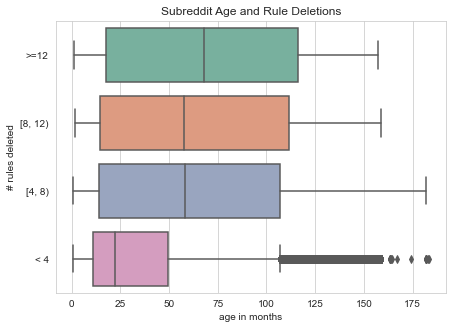

In [64]:
# Creating dataset
first_bin = np.array(sub_metadata[sub_metadata.deleted < 4].age_in_months)
second_bin = np.array(sub_metadata[(sub_metadata.deleted >= 4) & (sub_metadata.deleted < 8)].age_in_months)
third_bin = np.array(sub_metadata[(sub_metadata.deleted >= 8) & (sub_metadata.deleted < 12)].age_in_months)
fourth_bin = np.array(sub_metadata[(sub_metadata.deleted >= 12)].age_in_months)
data = np.array([fourth_bin, third_bin, second_bin, first_bin], dtype=object)

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(7, 5))
sns.boxplot(data=data.T, ax=ax, palette="Set2", saturation = 0.6, orient="h")
ax.set_xlabel("age in months")
ax.set_ylabel("# rules deleted")
ax.set_title("Subreddit Age and Rule Deletions")
ax.set_yticklabels(['>=12', '[8, 12)', '[4, 8)', '< 4'])
plt.savefig('../result_figures/age_and_deletions_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

## H: the older the sub, the fewer total changes they will make

C:\Users\nammy\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


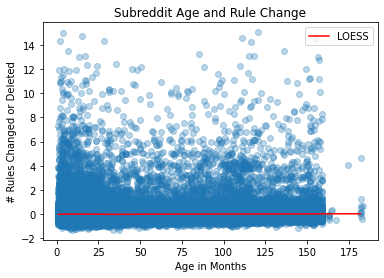

In [22]:
x = np.array(sub_metadata.age_in_months) 
y = np.array(sub_metadata.total_changes) + np.random.normal(0,0.3,len(sub_metadata))

# Plot the scatter plot with the calculated area
plt.scatter(x, y, alpha=0.3)

# LOESS smoother
sample_size = 10000
sample_indices = np.random.choice(len(x), sample_size, replace=False)
x_sample = x[sample_indices]
y_sample = y[sample_indices]
smoothed = lowess(y_sample, x_sample, frac=0.3)
plt.plot(smoothed[:,0], smoothed[:,1], label='LOESS', color='red')
plt.legend()

plt.xlabel("Age in Months")
plt.ylabel("# Rules Changed or Deleted")
plt.title("Subreddit Age and Rule Change")

plt.show()

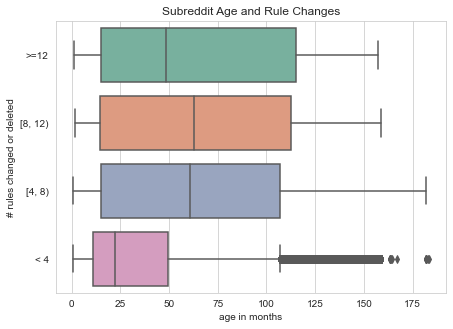

In [63]:
# Creating dataset
first_bin = np.array(sub_metadata[sub_metadata.total_changes < 4].age_in_months)
second_bin = np.array(sub_metadata[(sub_metadata.total_changes >= 4) & (sub_metadata.total_changes < 8)].age_in_months)
third_bin = np.array(sub_metadata[(sub_metadata.total_changes >= 8) & (sub_metadata.total_changes < 12)].age_in_months)
fourth_bin = np.array(sub_metadata[(sub_metadata.total_changes >= 12)].age_in_months)
data = np.array([fourth_bin, third_bin, second_bin, first_bin], dtype=object)
 
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(7, 5))
sns.boxplot(data=data.T, ax=ax, palette="Set2", saturation = 0.6, orient="h")
ax.set_xlabel("age in months")
ax.set_ylabel("# rules changed or deleted")
ax.set_title("Subreddit Age and Rule Changes")
ax.set_yticklabels(['>=12', '[8, 12)', '[4, 8)', '< 4'])

plt.savefig('../result_figures/age_and_changes_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

# Hypothesis testing-- Initial Rules

## H: the more initial rules the sub has, the more likely they will delete rules

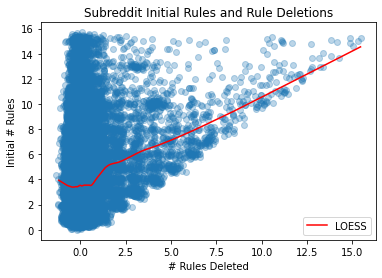

In [24]:
y = np.array(sub_metadata.rules_1) + np.random.normal(0,0.25,len(sub_metadata))
x = np.array(sub_metadata.deleted) + np.random.normal(0,0.3,len(sub_metadata))

# Plot the scatter plot with the calculated area
plt.scatter(x, y, alpha=0.3)

# LOESS smoother
sample_size = 10000
sample_indices = np.random.choice(len(x), sample_size, replace=False)
x_sample = x[sample_indices]
y_sample = y[sample_indices]
smoothed = lowess(y_sample, x_sample, frac=0.3)
plt.plot(smoothed[:,0], smoothed[:,1], label='LOESS', color='red')
plt.legend()


plt.ylabel("Initial # Rules")
plt.xlabel("# Rules Deleted")
plt.title("Subreddit Initial Rules and Rule Deletions")

plt.show()